# 1.このテキストについて
### テキストの目的
- データ分析の基本的な流れを知る
- データ分析ライブラリのPandasに慣れる
- KaggleのNotebooksを利用する

### どのように学ぶか
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

# 2.エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

# 3.KaggleのNotebooks

Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

# 4.データセットの準備

データセットはKaggleからダウンロードします。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

上記URLを開き、Dataのページへ移動してください。

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

# 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv')

# 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

### 解答
アイオワ州エイムスの各住宅の販売価格を予測することが本データセットの目的であり、予測値の対数と観測された販売価格の対数との間のRoot-Mean-Squared-Error（RMSE）で評価される。  

説明変数は、LotArea(敷地面積),YearBuilt(建設日),TotRmsAbvGrd(地上階の部屋数)など79種類存在する。  

SalePriceはドルでの物件の売却価格。これが、予測しようとしている目的変数である。  

提供されるデータは４つ  
- train.csv：トレーニングセット
- test.csv：テストセット
- data_description.txt：各列の完全な説明
- sample_submission.csv：提出するファイルのサンプル。これと同じ形式のファイルを作る。

# 5.データの概観

# 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [2]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- このデータセットは1460行81列からなり、その内数値データが38種類、文字データが43種類ある。　　
- 2列目から80列目までが特徴量で、81列目が目的変数。

In [4]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# 列を省略しないで表示したい・・・

#現在の最大表示列数の出力
print(pd.get_option("display.max_columns"))

#最大表示列数の指定（ここでは100列を指定）
pd.set_option('display.max_columns', 100)

20


In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

In [7]:
# 欠損値の数を確認（１個以上あるもののみを表示）
missing_val = train_data.isnull().sum()[train_data.isnull().sum()>0].sort_values(ascending=False)
missing_val

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# 欠損値を含む列のみを抽出
missing_col = missing_val.index.tolist()
train_missing = train_data[missing_col]

## missingnoの機能を確認する。
- Bar Chart
- Matrix
- Heatmap
- Dendrogram

50列までしかラベル表示されない。

In [9]:
# missingnoを読み込む
import missingno as msno

## Bar Chart
各特徴量でどれくらい欠損値があるのかがわかる。

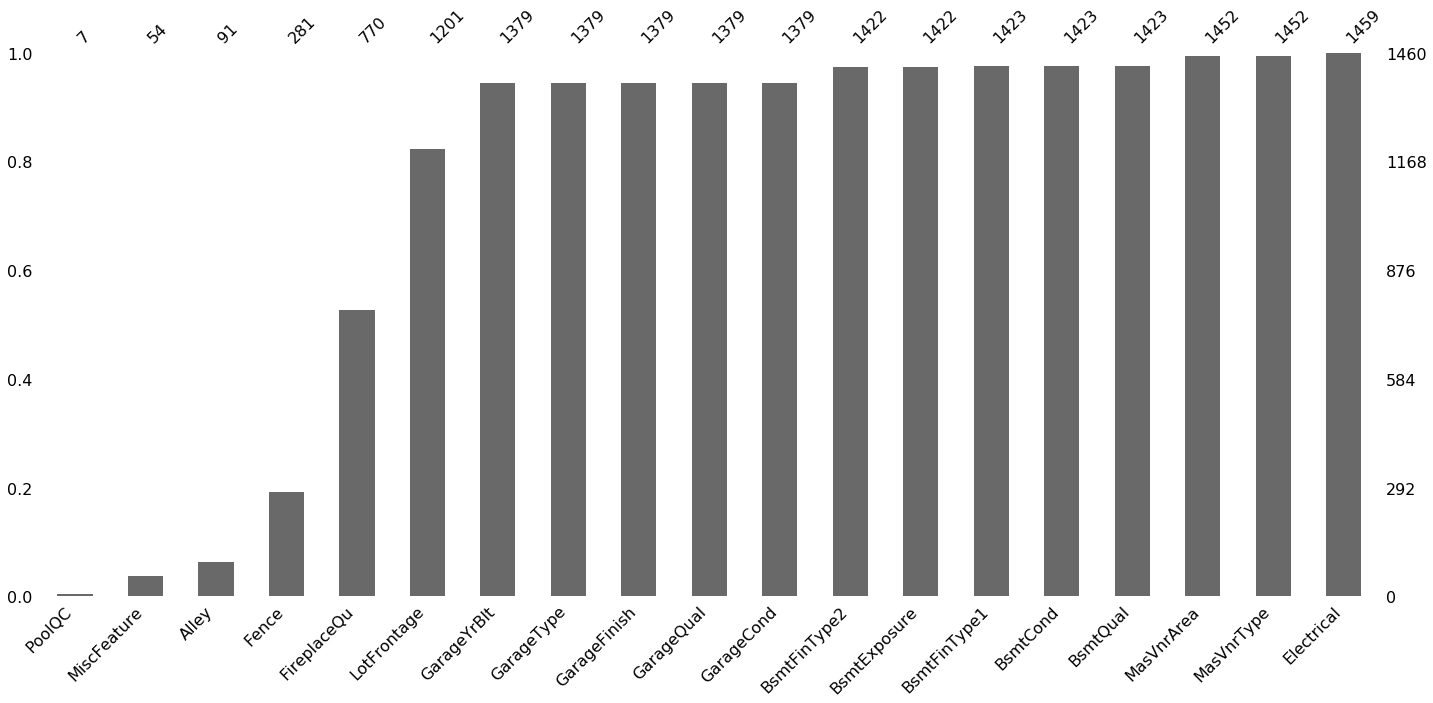

In [10]:
msno.bar(train_missing);

log=Trueを指定すると、対数目盛に切り替えることができる。

## Matrix
欠損値がデータ全体のどこに分布しているのががわかる。

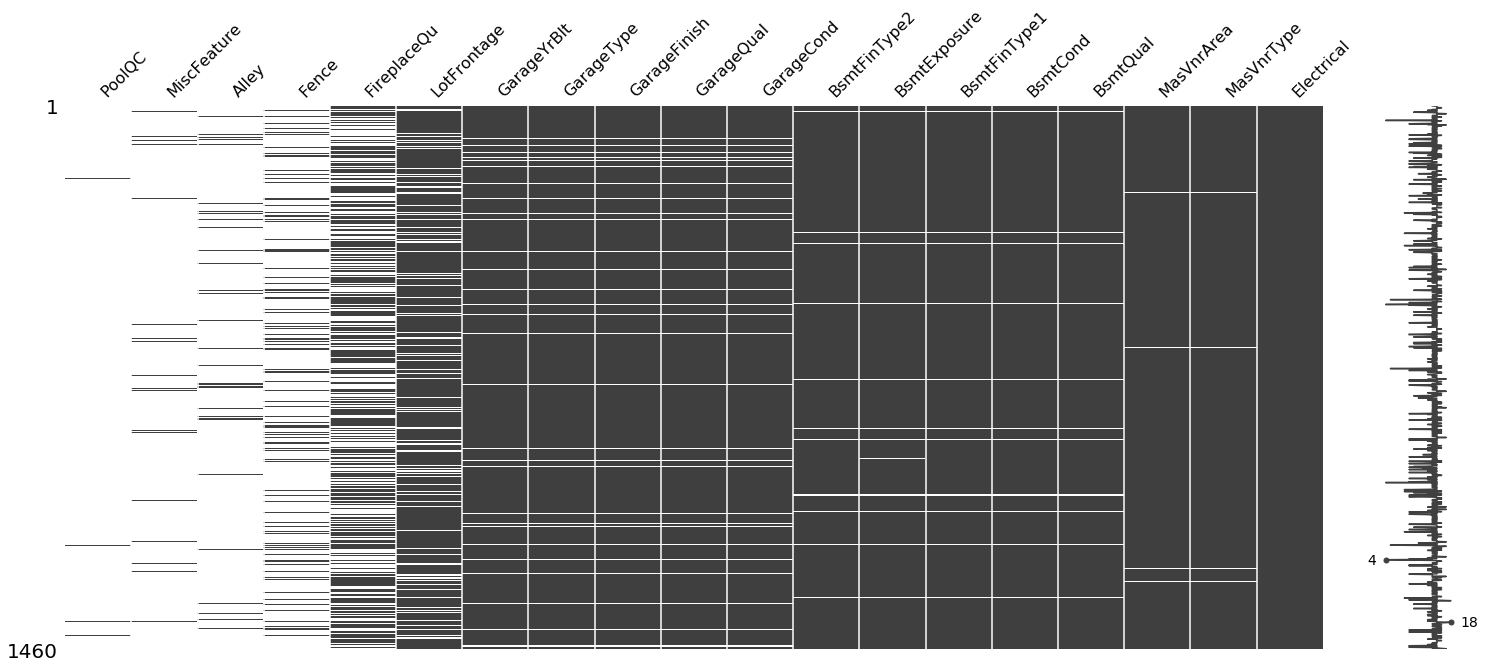

In [11]:
msno.matrix(train_missing);

## Heatmap
欠損値における特徴量間の相関度を表す。

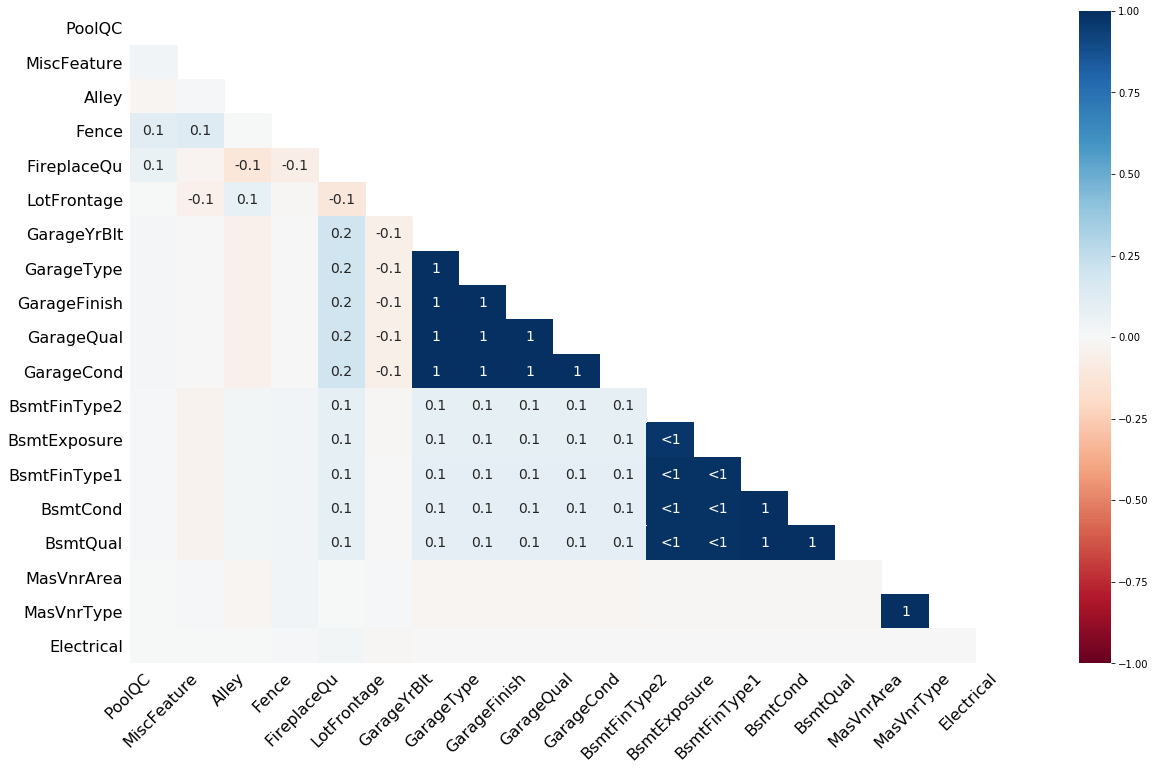

In [12]:
msno.heatmap(train_missing);

## Dendrogram
欠損値の分布で特徴量をまとめる。

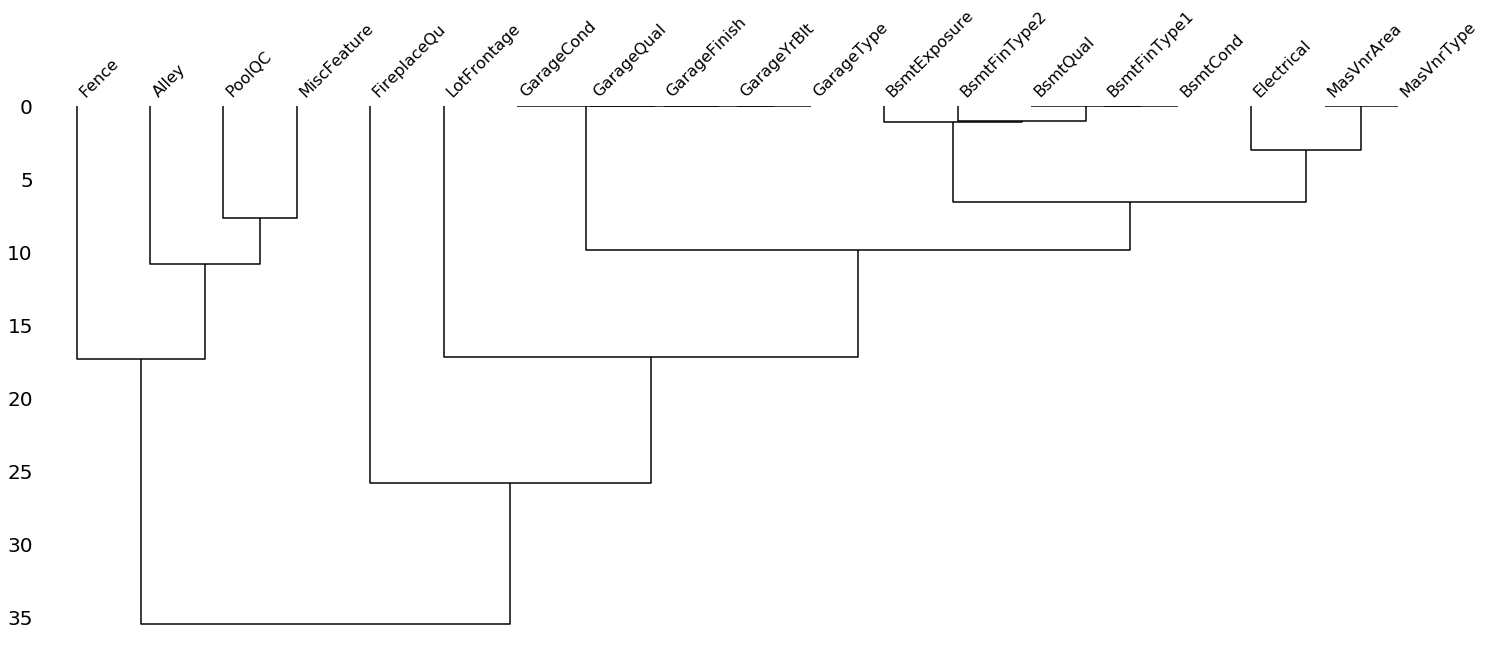

In [13]:
msno.dendrogram(train_missing);

In [14]:
# 欠損値が何パーセント含まれるかを確認する。

# 欠損値の数
total = train_data.isnull().sum().sort_values(ascending=False)

# 欠損値の比率
missing_ratio = total/len(train_data)

# 結合
missing_data = pd.concat([total, missing_ratio], axis=1, keys=['Total', 'missing_ratio'])
missing_data.head(19)

,Total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [15]:
# 5つ以上欠損値がある特徴量（列）は削除する。
train_data = train_data.dropna(thresh=len(train_data)-4, axis=1)
train_data.shape

(1460, 63)

元の列数81列で5つ以上欠損値を含む列数は18列。81-18=63なので正しく削除できている。

In [16]:
# 欠損値があるサンプル（行）は削除する。
train_data = train_data.dropna()
train_data.shape

(1459, 63)

In [17]:
# 欠損値の再確認
train_data.isnull().sum().sum()

0

# 6.目的変数

次は目的変数がどのような分布を持っているか確認していきます。

# 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

### 解答
- 尖度（kurtosis）

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。

- 歪度（skewness）

分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す。


![画像](https://gyazo.com/48b6faca96578860f227965f7f6a51e4.png)

# 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

尖度：6.529263049673958
歪度：1.8819429948035529


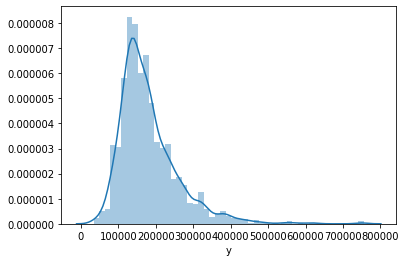

In [19]:
# 目的変数y
y = train_data['SalePrice']

# 尖度
print(f'尖度：{y.kurt()}')

# 歪度
print(f'歪度：{y.skew()}')

# 分布
sns.distplot(y, axlabel='y');

尖度：0.806927847502148
歪度：0.12131775882415026


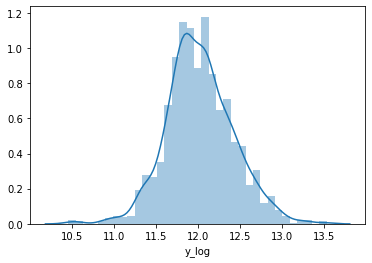

In [20]:
# 目的変数に対して対数変換を行う。
y_log = np.log(y)

# 尖度
print(f'尖度：{y_log.kurt()}')

# 歪度
print(f'歪度：{y_log.skew()}')

# 分布
sns.distplot(y_log, axlabel='y_log');

正規分布に従わないデータでも、対数変換を施すことで正規分布に近い形になった。

# 7.特徴量

# 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

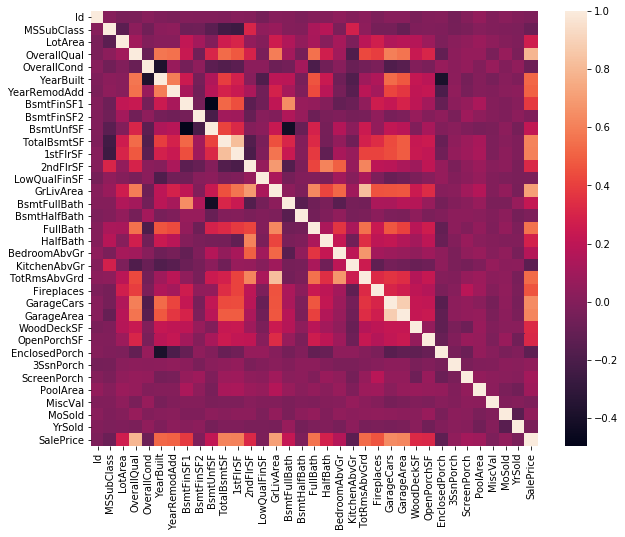

In [21]:
# 相関係数行列のヒートマップを作成
train_corr = train_data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(train_corr);

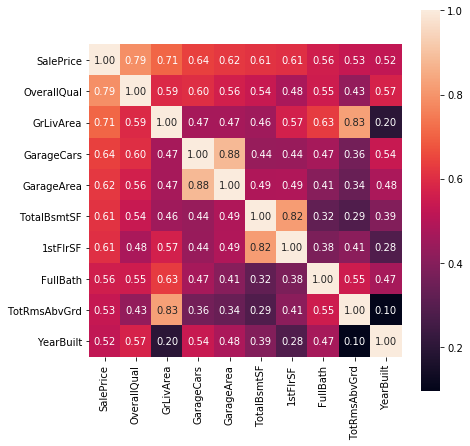

In [22]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
cols = train_corr['SalePrice'].sort_values(ascending=False)[:10].index
fig = plt.figure(figsize=(7,7))
sns.heatmap(train_data[cols].corr(), square=True, fmt='.2f', annot=True);

### 選んだ10個の特徴量の詳細
- SalePrice：物件の販売価格
- OverallQual：素材と品質
- GrLivArea：地上のリビングエリアの広さ
- GarageCars：ガレージに入る車の数
- GarageArea：ガレージの広さ
- TotalBsmtSF：地下室の広さ
- 1stFlrSF：１階の広さ
- FullBath：地上のバスルームの数
- TotRmsAbvGrd：地上の部屋数
- YearBuilt：建設日

### 相関の高い組み合わせ３つ
- GarageCarsとGarageArea
- 1stFlrSFとTotalBsmtSF
- GrLivAreaとTotRmsAbvGrd

ガレージが広ければたくさん車を入れられる。1階が広いと地下室も広い。リビングが広いと部屋数が多い。  
いずれも感覚的にも納得がいく相関関係があることがわかった。

<参考>  
[多重共線性の問題が説明変数間の相関が強いときに起こる理由を数式から見てみる](https://qiita.com/fhiyo/items/6d4faa7c26d46022ac09)  
[統計学と機械学習におけるマルチコ（多重共線性）に対する考えの相違](https://yolo-kiyoshi.com/2019/05/27/post-1160/)